# Pulmonary Fibrosis Kaggle


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd /content/gdrive/My Drive/kaggle
!pwd

/content/gdrive/My Drive/kaggle
/content/gdrive/My Drive/kaggle


In [ ]:
!pip install pandas-profiling==2.8.0

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

# 1. Data

In [6]:
train=pd.read_csv('dataset/osic-pulmonary-fibrosis-progression/train.csv')
print('Train Data:')
print(train.head())

test=pd.read_csv('dataset/osic-pulmonary-fibrosis-progression/test.csv')
print('\n\nTest Data:')
print(test.head())

sub=pd.read_csv('dataset/osic-pulmonary-fibrosis-progression/sample_submission.csv')
print('\n\nSubmission File:')
print(sub.head())

Train Data:
                     Patient  Weeks   FVC    Percent  Age   Sex SmokingStatus
0  ID00007637202177411956430     -4  2315  58.253649   79  Male     Ex-smoker
1  ID00007637202177411956430      5  2214  55.712129   79  Male     Ex-smoker
2  ID00007637202177411956430      7  2061  51.862104   79  Male     Ex-smoker
3  ID00007637202177411956430      9  2144  53.950679   79  Male     Ex-smoker
4  ID00007637202177411956430     11  2069  52.063412   79  Male     Ex-smoker


Test Data:
                     Patient  Weeks   FVC    Percent  Age   Sex SmokingStatus
0  ID00419637202311204720264      6  3020  70.186855   73  Male     Ex-smoker
1  ID00421637202311550012437     15  2739  82.045291   68  Male     Ex-smoker
2  ID00422637202311677017371      6  1930  76.672493   73  Male     Ex-smoker
3  ID00423637202312137826377     17  3294  79.258903   72  Male     Ex-smoker
4  ID00426637202313170790466      0  2925  71.824968   73  Male  Never smoked


Submission File:
                    

* Some patients had their FVC value tested before the CT Scan(negative values for Weeks)

In [ ]:
ProfileReport(train,progress_bar=False)

In [ ]:
ProfileReport(test,progress_bar=False)

In [ ]:
ProfileReport(sub,progress_bar=False)

# 2. EDA with Visualization

## # Patients Reading Distribution

No of unique patients: 176
176
Min no. of readings for a patient: 6
Max no. of readings for a patient: 10


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([], <a list of 0 Text major ticklabel objects>)

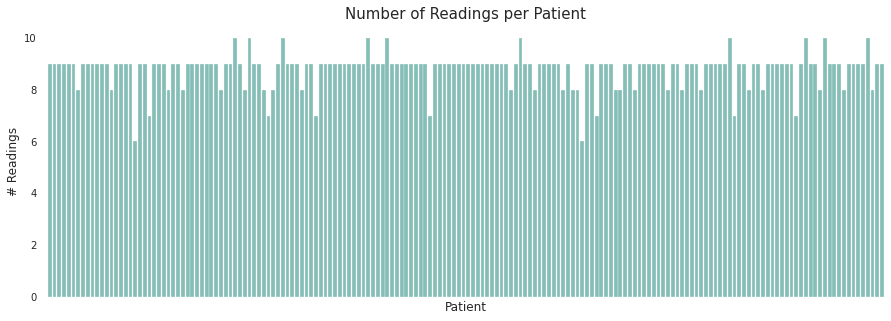

In [ ]:
print('No of unique patients:',len(train.Patient.unique()))

readings=train.groupby('Patient').Weeks.count()
print(len(readings))
print('Min no. of readings for a patient:', min(readings))
print('Max no. of readings for a patient:', max(readings))

fig=plt.figure(figsize=(15,5))
sns.barplot(readings.index,readings,color='#7AC8BE')
plt.title('Number of Readings per Patient',size=15)
plt.xlabel('Patient',size=12)
plt.ylabel('# Readings',size=12)
plt.xticks([])

## # Patients Age Details

Minimum aged patient: 49
Maximum aged patient: 88


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

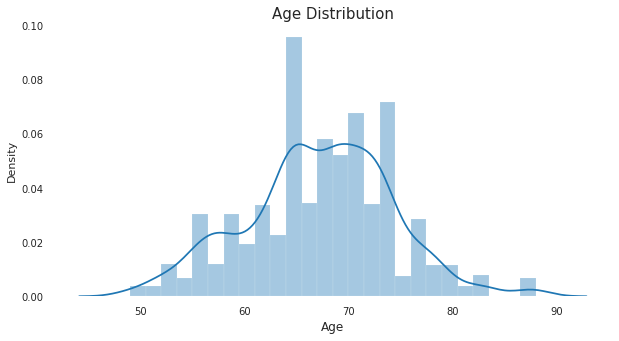

In [ ]:
#Age
print('Minimum aged patient:',min(train['Age']))
print('Maximum aged patient:',max(train['Age']))

fig=plt.figure(figsize=(10,5))
sns.distplot(train['Age'])
plt.title('Age Distribution',size=15)
plt.xlabel('Age',size=12)

## # Patients Gender Details

Male Patients: 139
Female Patients: 37


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Sex')

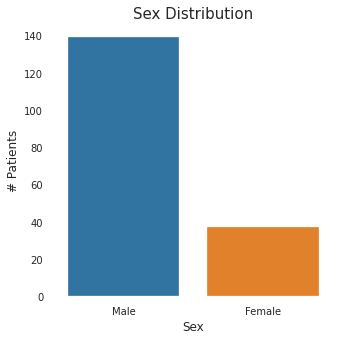

In [ ]:
#Sex
sex=train.groupby('Patient').Sex.first()

print('Male Patients:',sex.value_counts()[0])
print('Female Patients:',sex.value_counts()[1])

fig=plt.figure(figsize=(5,5))                                              
sns.countplot(sex)
plt.title('Sex Distribution',size=15)
plt.ylabel('# Patients',size=12)
plt.xlabel('Sex',size=12)

Ex-smokers: 118
Patients who never smoked: 49
Patients who currently smoke: 9


Text(0.5, 0, 'Status')

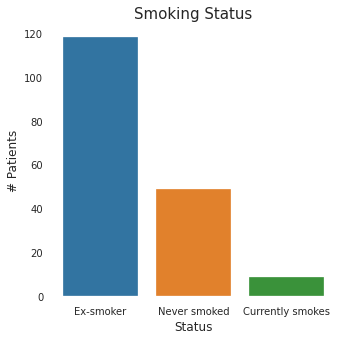

In [ ]:
#Smoking status
smoke=train.groupby('Patient').SmokingStatus.first()
print('Ex-smokers:',smoke.value_counts()[0])
print('Patients who never smoked:',smoke.value_counts()[1])
print('Patients who currently smoke:',smoke.value_counts()[2])

fig=plt.figure(figsize=(5,5))                                              
sns.countplot(smoke)
plt.title('Smoking Status',size=15)
plt.ylabel('# Patients',size=12)
plt.xlabel('Status',size=12)

### * Forced vital capacity (FVC) is the amount of air that can be forcibly exhaled from your lungs after taking the deepest breath possible. The recorded lung capacity in ml.

Maximum FVC value: 6399
Minimum FVC value: 827


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'FVC Value')

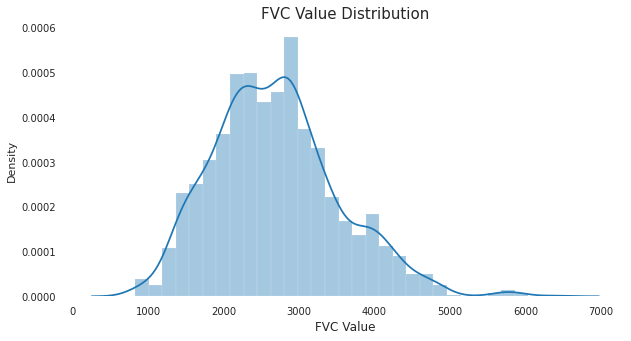

In [ ]:
#FVC value
print('Maximum FVC value:',max(train['FVC']))
print('Minimum FVC value:',min(train['FVC']))

fig=plt.figure(figsize=(10,5))
sns.distplot(train['FVC'])
plt.title('FVC Value Distribution',size=15)
plt.xlabel('FVC Value',size=12)

### * Percent - a computed field which approximates the patient's FVC as a percent of the typical FVC for a person of similar characteristics.

Maximum Percentage: 153.145377828922
Minimum Percentage: 28.877576671694303


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Percent')

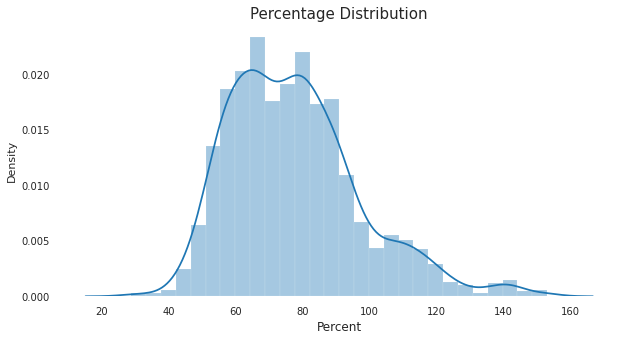

In [ ]:
#Percent
print('Maximum Percentage:',max(train['Percent']))
print('Minimum Percentage:',min(train['Percent']))

fig=plt.figure(figsize=(10,5))
sns.distplot(train['Percent'])
plt.title('Percentage Distribution',size=15)
plt.xlabel('Percent',size=12)

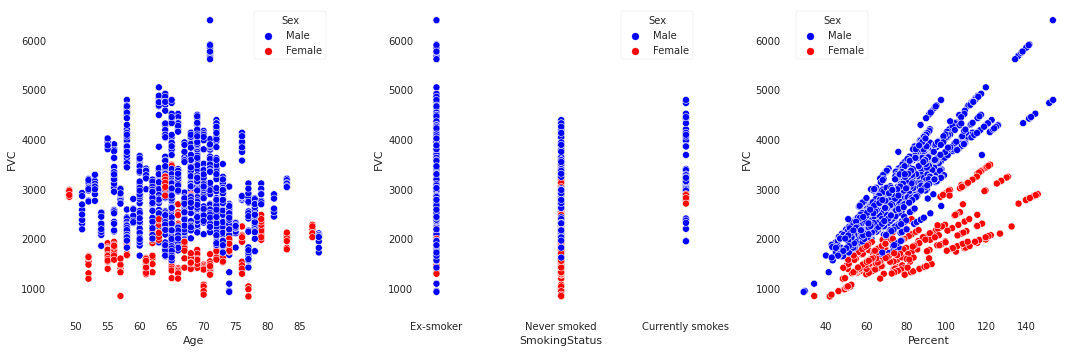

In [ ]:
#Scatterplot to check correlations
a=train[['Age','SmokingStatus','Percent']]
fig=plt.figure(figsize=(15,5))
for i in range(len(a.columns)):
    fig.add_subplot(1,3,i+1)
    sns.scatterplot(x=a.iloc[:,i],y=train['FVC'],hue=train['Sex'],palette=['blue','red'])
plt.tight_layout()
plt.show()

### 1. Age and Smoking Status has no correlation with the FVC value.
### 2.  Percent and FVC are highly correlated

---



# 3. Dicom Data 📁

-References: 
* https://www.kaggle.com/gzuidhof/full-preprocessing-tutorial
* https://www.kaggle.com/allunia/pulmonary-dicom-preprocessing

Thanks to Guido Zuidhof (@gzuidhof) and Laura Fink (@allunia) for these really insightful notebooks. 

## # Reading the Metadata 🗃

In [7]:
!pip install pydicom

     |████████████████████████████████| 1.9MB 6.0MB/s 


In [8]:
import pydicom as dicom
import cv2

data_dir='dataset/osic-pulmonary-fibrosis-progression/train/'
patients=os.listdir(data_dir)
print(len(patients))
labels_df=pd.read_csv('dataset/osic-pulmonary-fibrosis-progression/train.csv',index_col=0)
#labels_df=labels_df[['FVC']]
labels_df.head()

176


Weeks   FVC    Percent  Age   Sex SmokingStatus
Patient                                                                   
ID00007637202177411956430     -4  2315  58.253649   79  Male     Ex-smoker
ID00007637202177411956430      5  2214  55.712129   79  Male     Ex-smoker
ID00007637202177411956430      7  2061  51.862104   79  Male     Ex-smoker
ID00007637202177411956430      9  2144  53.950679   79  Male     Ex-smoker
ID00007637202177411956430     11  2069  52.063412   79  Male     Ex-smoker

In [ ]:
#Viewing the metadata of the dicom file

for patient in patients[1:2]:
    label=labels_df.loc[patient,'FVC']
    path=data_dir+'/'+patient
    slices=[dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    print('No. of scans:',len(slices))
    print('Height and width of the scan:',slices[0].pixel_array.shape)
    print('\nMetadata of the Dicom File:')
    print(slices[1])

No. of scans: 394
Height and width of the scan: (768, 768)

Metadata of the Dicom File:
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.0.37492.1591423153.182587
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002, 0013) Implementation Version Name         SH: 'OSIRIX_361'
(0002, 0016) Source Application Entity Title     AE: 'ANONYMOUS'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: ['ISO 2022 IR 100', 'ISO 2022 IR 100']
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0018) SOP Instance UID   

###     From the above data we can see that:
* This patient has 394 images of his/her ct scan
* Each image is a 768x768 pixel image

In [ ]:
#Viewing the ct scan size for 5 different patients
c=0
for patient in patients:
    try:
        label=labels_df.loc[patient,'FVC']
        path=data_dir+'/'+patient
        slices=[dicom.read_file(path + '/' + s) for s in os.listdir(path)]
        slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
        print(len(slices),slices[0].pixel_array.shape)
        c+=1
        if c==5:
            break
    except:
        continue

30 (512, 512)
394 (768, 768)
106 (512, 512)
49 (512, 512)
31 (843, 888)


* We see each patient has different ct scan size
* The number of scans for each patient is different
* So we need to resize each image to the same size to feed into our model

In [8]:
min_s=9999
max_s=0
for patient in patients[:]:
    label=labels_df.loc[patient,'FVC']
    path=data_dir+'/'+patient
    slices=[len(s) for s in os.listdir(path)]
    print(patient, len(slices))
    if len(slices)<min_s:
        min_s=len(slices)
    if len(slices)>max_s:
        max_s=len(slices)
print('Minimum number of scans for any patient:',min_s)
print('Maximum number of scans for any patient:',max_s)

ID00007637202177411956430 30
ID00009637202177434476278 394
ID00010637202177584971671 106
ID00011637202177653955184 31
ID00012637202177665765362 49
ID00014637202177757139317 31
ID00015637202177877247924 295
ID00019637202178323708467 29
ID00020637202178344345685 493
ID00023637202179104603099 27
ID00025637202179541264076 24
ID00026637202179561894768 239
ID00027637202179689871102 358
ID00030637202181211009029 433
ID00032637202181710233084 205
ID00035637202182204917484 574
ID00038637202182690843176 346
ID00042637202184406822975 497
ID00047637202184938901501 103
ID00048637202185016727717 26
ID00051637202185848464638 122
ID00052637202186188008618 311
ID00060637202187965290703 275
ID00061637202188184085559 253
ID00062637202188654068490 30
ID00067637202189903532242 319
ID00068637202190879923934 118
ID00072637202198161894406 24
ID00073637202198167792918 355
ID00075637202198610425520 320
ID00076637202199015035026 64
ID00077637202199102000916 94
ID00078637202199415319443 1018
ID0008263720220183622

## Visualization📷

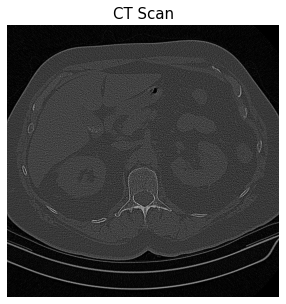

In [11]:
#Single Frame 2D Visualization for a patient
import cv2

for patient in patients[1:2]:
    label=labels_df.loc[patient,'FVC']
    path=data_dir+'/'+patient
    slices=[dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    
    fig=plt.figure(figsize=(5,5))
    plt.axis('off')
    plt.title('CT Scan',size=15)
    plt.imshow(slices[0].pixel_array,cmap='gray')
    plt.show()

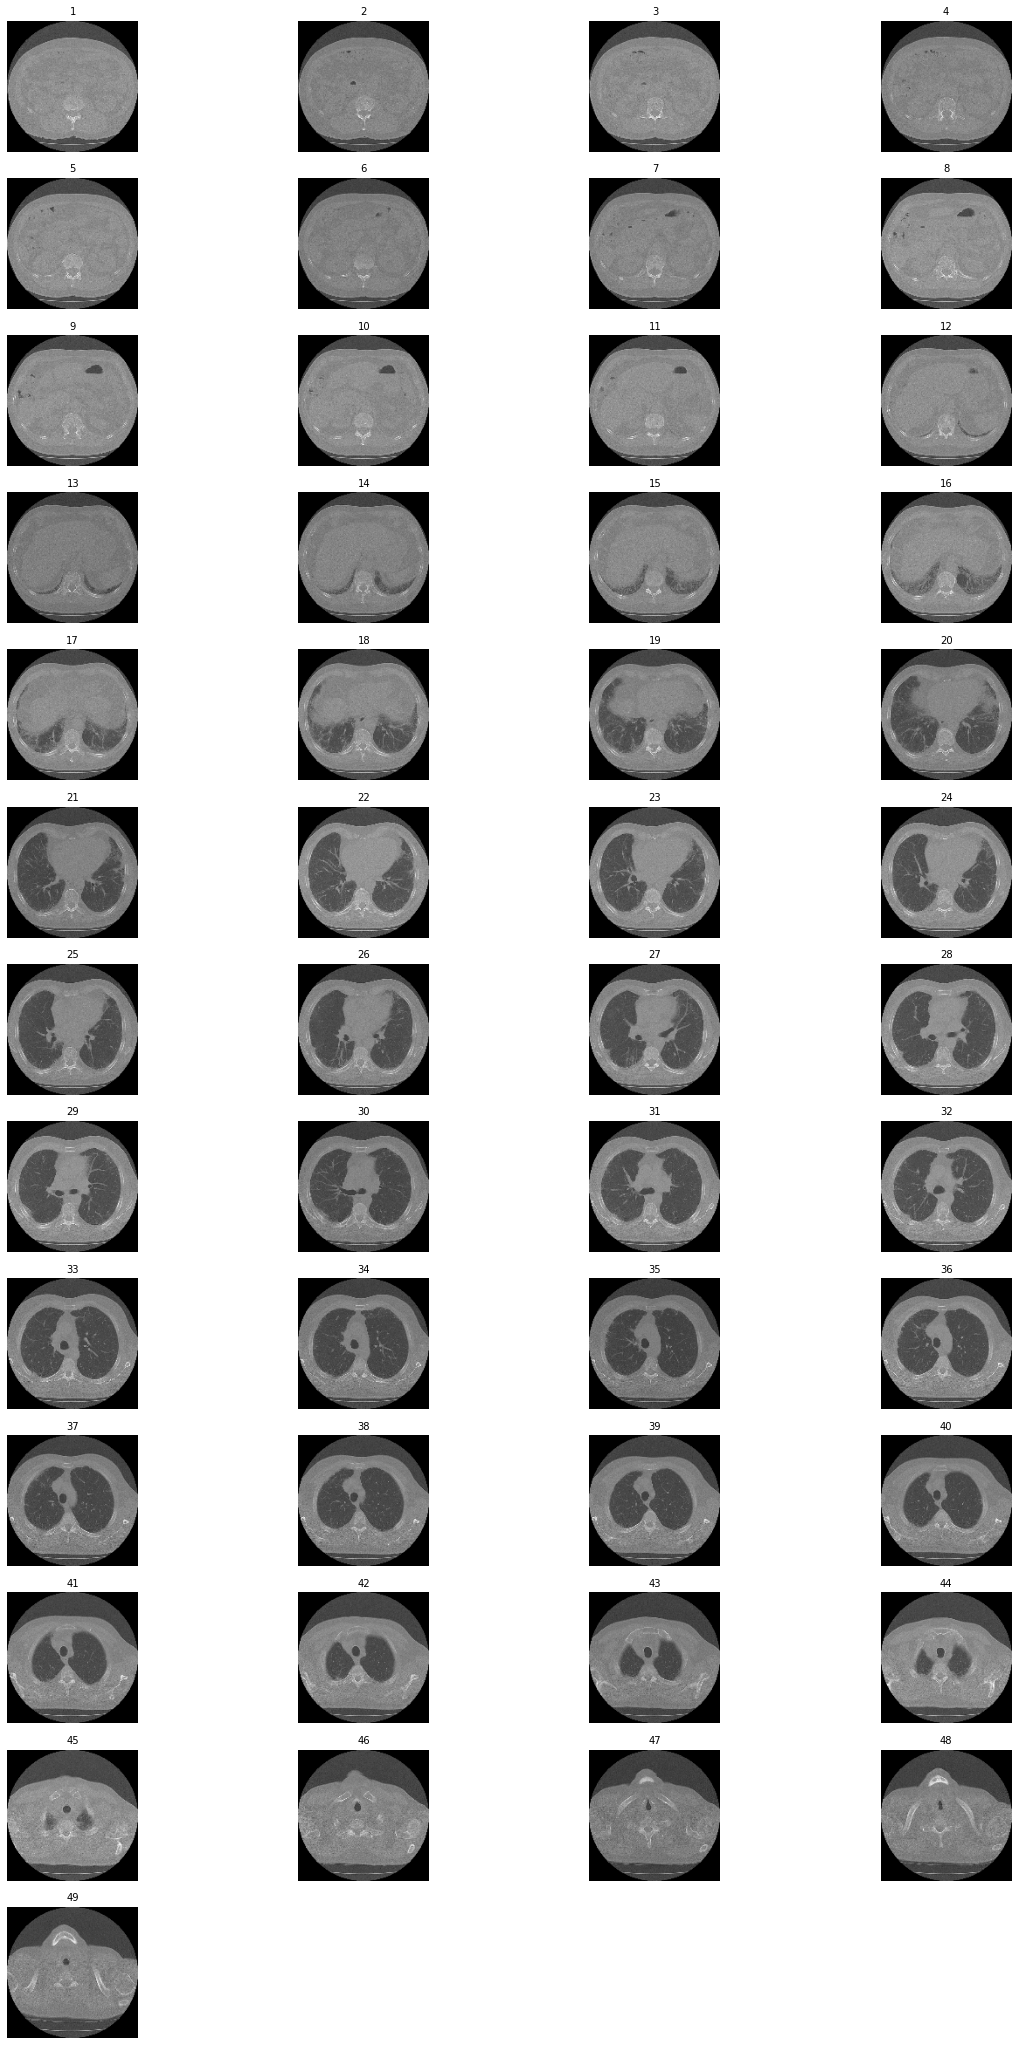

In [13]:
#2D Visualization of all the scans for a patient with number less than 50 and greater than 35
import cv2

for patient in patients:
    label=labels_df.loc[patient,'FVC']
    path=data_dir+'/'+patient
    slices=[dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    
    img_px_size=150
    
    try:
        if len(slices)<50 and len(slices)>35:
            fig=plt.figure(figsize=(20,40))
            for num,each_slice in enumerate(slices):
                fig.add_subplot(14,4,num+1)
                new_image=cv2.resize(np.array(each_slice.pixel_array),(img_px_size,img_px_size))
                plt.axis('off')
                plt.title(num+1,size=10)
                plt.imshow(new_image,cmap='gray')
            plt.show()
            break
    except:
        continue

## # HU (Hounsfield Scale) Values

In [9]:
# Load the scans in given folder path
def load_scan(path):
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices

In [10]:
def get_pixels_hu(slices):
    image = np.stack([s.pixel_array for s in slices])
    # Convert to int16 (from sometimes int16), 
    # should be possible as values should always be low enough (<32k)
    image = image.astype(np.int16)

    # Set outside-of-scan pixels to 0
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0
    
    # Convert to Hounsfield units (HU)
    for slice_number in range(len(slices)):
        
        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope
        
        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)
            
        image[slice_number] += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)

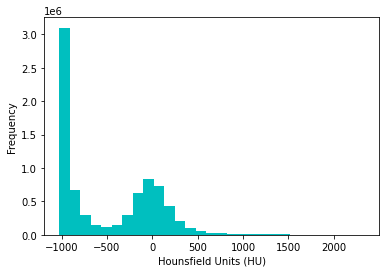

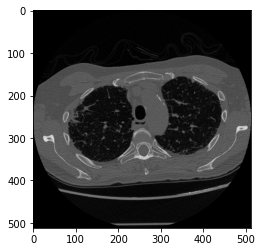

In [11]:
first_patient = load_scan(data_dir + '/' + patients[0])
first_patient_pixels = get_pixels_hu(first_patient)
plt.hist(first_patient_pixels.flatten(), bins=29, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

# Show some slice in the middle
plt.imshow(first_patient_pixels[21], cmap=plt.cm.gray)
plt.show()

# 4. Preprocessing 📝

### # Drop Duplicates 

In [12]:
#Drop duplicate values from the training dataset
drop=train[train.duplicated(subset=['Patient','Weeks'],keep='last')]
print('No. of rows to be dropped:',drop.shape[0])
train.drop_duplicates(subset=['Patient','Weeks'],keep='last',inplace=True)

No. of rows to be dropped: 7


* Not many duplicate values are present in the dataset.
* We keep the last value and drop all the previous iterations.

### # Splitting the Submission File and Concatenating

In [13]:
#Split Patient_Week Column from the submission file
sub[['Patient','Weeks']]=sub.Patient_Week.str.split("_",expand = True)
sub=sub[['Patient','Weeks','Confidence','Patient_Week']]
sub.head()

Patient Weeks  Confidence                   Patient_Week
0  ID00419637202311204720264   -12         100  ID00419637202311204720264_-12
1  ID00421637202311550012437   -12         100  ID00421637202311550012437_-12
2  ID00422637202311677017371   -12         100  ID00422637202311677017371_-12
3  ID00423637202312137826377   -12         100  ID00423637202312137826377_-12
4  ID00426637202313170790466   -12         100  ID00426637202313170790466_-12

In [14]:
#Merging submission file and test file
sub=sub.merge(test.drop('Weeks',axis = 1),on="Patient")
sub.head()

Patient Weeks  Confidence  ... Age   Sex  SmokingStatus
0  ID00419637202311204720264   -12         100  ...  73  Male      Ex-smoker
1  ID00419637202311204720264   -11         100  ...  73  Male      Ex-smoker
2  ID00419637202311204720264   -10         100  ...  73  Male      Ex-smoker
3  ID00419637202311204720264    -9         100  ...  73  Male      Ex-smoker
4  ID00419637202311204720264    -8         100  ...  73  Male      Ex-smoker

[5 rows x 9 columns]

In [15]:
#Introduce a column to indicate the source dataset for the data
#Then Merge train and test data
train['Dataset']='train'
sub['Dataset']='test'

data=train.append([sub])
data.reset_index(inplace = True,drop=True)
data.head()

Patient Weeks   FVC  ...  Dataset  Confidence Patient_Week
0  ID00007637202177411956430    -4  2315  ...    train         NaN          NaN
1  ID00007637202177411956430     5  2214  ...    train         NaN          NaN
2  ID00007637202177411956430     7  2061  ...    train         NaN          NaN
3  ID00007637202177411956430     9  2144  ...    train         NaN          NaN
4  ID00007637202177411956430    11  2069  ...    train         NaN          NaN

[5 rows x 10 columns]

In [16]:
#Conveting categorical data to numerical data and dropping the categorical columns
#Conversion
data = pd.concat([
    data,
    pd.get_dummies(data.Sex),
    pd.get_dummies(data.SmokingStatus)
],axis=1)

#Dropping
data.drop(['Sex','SmokingStatus'],axis=1,inplace=True)
data['Weeks']=data['Weeks'].astype('int64')
data.head()

Patient  Weeks  ...  Ex-smoker  Never smoked
0  ID00007637202177411956430     -4  ...          1             0
1  ID00007637202177411956430      5  ...          1             0
2  ID00007637202177411956430      7  ...          1             0
3  ID00007637202177411956430      9  ...          1             0
4  ID00007637202177411956430     11  ...          1             0

[5 rows x 13 columns]

In [17]:
#Getting the baseline week as every patient had thier first at different points of time w.r.t their CT scans
def get_baseline(df):  
    _df=df.copy()
    _df['min_week']=_df['Weeks']
    # as test data is containing all weeks 
    _df.loc[_df.Dataset=='test','min_week']=0
    _df["min_week"]=_df.groupby('Patient')['Weeks'].transform('min')
    _df['baselined_week']=_df['Weeks']-_df['min_week']
    
    return _df   


data['Weeks']=data['Weeks'].astype('int64')
data=get_baseline(data)
data.head()

Patient  Weeks  ...  min_week  baselined_week
0  ID00007637202177411956430     -4  ...        -4               0
1  ID00007637202177411956430      5  ...        -4               9
2  ID00007637202177411956430      7  ...        -4              11
3  ID00007637202177411956430      9  ...        -4              13
4  ID00007637202177411956430     11  ...        -4              15

[5 rows x 15 columns]

In [18]:
def get_baseline_FVC(df):
    # same as above
    _df = df.copy()
    base = _df.loc[_df.Weeks == _df.min_week]
    base = base[['Patient','FVC']].copy()
    base.columns = ['Patient','base_FVC']
    
    # add a row which contains the cumulated sum of rows for each patient
    base['nb'] = 1
    base['nb'] = base.groupby('Patient')['nb'].transform('cumsum')
    
    # drop all except the first row for each patient (= unique rows!), containing the min_week
    base = base[base.nb == 1]
    base.drop('nb', axis = 1, inplace = True)
    
    # merge the rows containing the base_FVC on the original _df
    _df = _df.merge(base, on = 'Patient', how = 'left')    
    _df.drop(['min_week'], axis = 1)
    
    return _df

data=get_baseline_FVC(data)
data.head()

Patient  Weeks   FVC  ...  min_week  baselined_week base_FVC
0  ID00007637202177411956430     -4  2315  ...        -4               0     2315
1  ID00007637202177411956430      5  2214  ...        -4               9     2315
2  ID00007637202177411956430      7  2061  ...        -4              11     2315
3  ID00007637202177411956430      9  2144  ...        -4              13     2315
4  ID00007637202177411956430     11  2069  ...        -4              15     2315

[5 rows x 16 columns]

In [19]:
#Scaling Features
def scaling(series):
    return (series-series.min())/(series.max()-series.min())

data['Age']=scaling(data['Age'])
data['Percent']=scaling(data['Percent'])
data['baselined_week']=scaling(data['baselined_week'])
data['base_FVC']=scaling(data['base_FVC'])
data.head()

Patient  Weeks   FVC  ...  min_week  baselined_week  base_FVC
0  ID00007637202177411956430     -4  2315  ...        -4        0.000000  0.241456
1  ID00007637202177411956430      5  2214  ...        -4        0.062069  0.241456
2  ID00007637202177411956430      7  2061  ...        -4        0.075862  0.241456
3  ID00007637202177411956430      9  2144  ...        -4        0.089655  0.241456
4  ID00007637202177411956430     11  2069  ...        -4        0.103448  0.241456

[5 rows x 16 columns]

# 5. Model 

* Reference: https://www.kaggle.com/reighns/higher-lb-score-by-tuning-mloss-around-6-811

Thanks to Hongnan Gao (@reighns) for his notebook

In [20]:
!pip install tensorflow_addons

     |████████████████████████████████| 706kB 6.4MB/s 


In [21]:
import tensorflow as tf
from tensorflow_addons.layers import WeightNormalization
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Lambda, Input
from tensorflow.keras.models import Sequential, Model

# create constants for the loss function
C1, C2 = tf.constant(70, dtype='float32'), tf.constant(1000, dtype="float32")

# define competition metric
def score(y_true, y_pred):
    """Calculate the competition metric"""
    tf.dtypes.cast(y_true, tf.float32)
    tf.dtypes.cast(y_pred, tf.float32)
    sigma = y_pred[:, 2] - y_pred[:, 0]
    fvc_pred = y_pred[:, 1]
    
    sigma_clip = tf.maximum(sigma, C1)
    # Python is automatically broadcasting y_true with shape (1,0) to 
    # shape (3,0) in order to make this subtraction work
    delta = tf.abs(y_true[:, 0] - fvc_pred)
    delta = tf.minimum(delta, C2)
    sq2 = tf.sqrt( tf.dtypes.cast(2, dtype = tf.float32) )
    metric = (delta / sigma_clip) * sq2 + tf.math.log(sigma_clip * sq2)
    return K.mean(metric)

# define pinball loss
def qloss(y_true, y_pred):
    """Calculate Pinball loss"""
    # IMPORTANT: define quartiles, feel free to change here!
    qs = [0.2, 0.50, 0.8]
    q = tf.constant(np.array([qs]), dtype = tf.float32)
    e = y_true - y_pred
    v = tf.maximum(q * e, (q-1) * e)
    return K.mean(v)

# combine competition metric and pinball loss to a joint loss function
def mloss(_lambda):
    """Combine Score and qloss"""
    def loss(y_true, y_pred):
        return _lambda * qloss(y_true, y_pred) + (1 - _lambda) * score(y_true, y_pred)
    return loss

In [23]:
def make_model(nh):
    z = Input((nh,), name="Patient")
    x = Dense(100, activation="elu", name="d1")(z)
    x = Dense(100, activation="elu", name="d3")(x)
    p1 = Dense(3, activation="linear", name="p1")(x)
    p2 = Dense(3, activation="elu", name="p2")(x)
    preds = Lambda(lambda x: x[0] + tf.cumsum(x[1], axis=1), 
                     name="preds")([p1, p2])
    
    model = Model(z,preds,name="CNN")
    model.compile(loss=mloss(0.8), optimizer=tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False), metrics=[score])
    return model

In [24]:
## GET TRAINING DATA AND TARGET VALUE

# get back original data split
features_list=['baselined_week', 'Percent', 'Age', 'base_FVC', 'Male', 'Female', 'Ex-smoker', 'Never smoked', 'Currently smokes']
train=data.loc[data.Dataset == 'train']
sub=data.loc[data.Dataset == 'test']

# get target value
y=train['FVC'].values.astype(float)

# get training & test data
X_train=train[features_list].values
X_test=sub[features_list].values
n_rows=X_train.shape[1]

# instantiate target arrays
train_preds=np.zeros((X_train.shape[0], 3))
test_preds=np.zeros((X_test.shape[0], 3))

In [25]:
model=make_model(n_rows)
print(model.summary())

Model: "CNN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Patient (InputLayer)            [(None, 9)]          0                                            
__________________________________________________________________________________________________
d1 (Dense)                      (None, 100)          1000        Patient[0][0]                    
__________________________________________________________________________________________________
d3 (Dense)                      (None, 100)          10100       d1[0][0]                         
__________________________________________________________________________________________________
p1 (Dense)                      (None, 3)            303         d3[0][0]                         
________________________________________________________________________________________________

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold, GroupKFold, StratifiedKFold
from keras import backend as K

reduce_lr_loss=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.4,patience=150,verbose=0,epsilon=1e-4,mode='min')

NFOLD = 6
kf = KFold(n_splits=NFOLD)
OOF_val_score=[]

cnt = 0
BATCH_SIZE=128
EPOCHS = 800
for tr_idx, val_idx in kf.split(X_train):
    cnt += 1
    print(f"FOLD {cnt}")
    model=make_model(n_rows)
    history=model.fit(X_train[tr_idx], y[tr_idx], batch_size=BATCH_SIZE, epochs=EPOCHS, 
            validation_data=(X_train[val_idx], y[val_idx]), verbose=0, callbacks=[reduce_lr_loss])
    print("train", model.evaluate(X_train[tr_idx], y[tr_idx], verbose=0, batch_size=BATCH_SIZE))
    print("val", model.evaluate(X_train[val_idx], y[val_idx], verbose=0, batch_size=BATCH_SIZE))
    print("predict val...")
    train_preds[val_idx]=model.predict(X_train[val_idx],batch_size=BATCH_SIZE, verbose=0)
    
    # append OOF evaluation to calculate OFF_Score
    OOF_val_score.append(model.evaluate(X_train[val_idx], y[val_idx], verbose = 0, batch_size = BATCH_SIZE, return_dict = True)['score'])
    
    print("predict test...")
    test_preds+=model.predict(X_test, batch_size=BATCH_SIZE, verbose=0)/NFOLD

FOLD 1
train [43.652610778808594, 6.616440296173096]
val [43.88689041137695, 6.4817986488342285]
predict val...
predict test...
FOLD 2
train [43.04651641845703, 6.603309154510498]
val [48.800559997558594, 6.814262390136719]
predict val...
predict test...
FOLD 3
train [43.024505615234375, 6.603634357452393]
val [50.863704681396484, 6.8228278160095215]
predict val...
predict test...
FOLD 4
train [43.7614860534668, 6.626055717468262]
val [48.31715393066406, 6.496798992156982]
predict val...
predict test...
FOLD 5
train [44.383148193359375, 6.6260762214660645]
val [44.64958953857422, 6.513975143432617]
predict val...
predict test...
FOLD 6
train [43.28158187866211, 6.596803665161133]
val [46.048423767089844, 6.676042079925537]
predict val...
predict test...


# 6. Evaluation and Submission ✅🏁

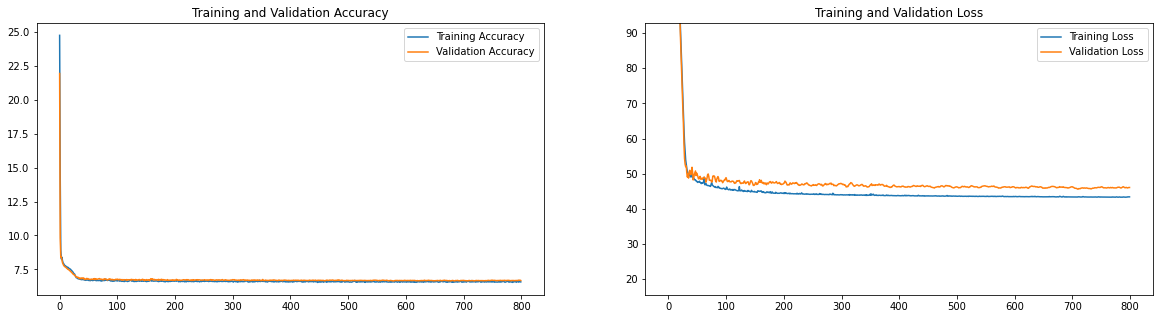

In [28]:
# fetch results from history
score = history.history['score']
val_score = history.history['val_score']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

# create subplots
plt.figure(figsize = (20,5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, score, label = 'Training Accuracy')
plt.plot(epochs_range, val_score, label = 'Validation Accuracy')
# limit y-values for better zoom-scale. Remember that roughly -4.5 is the best possible score
# plt.ylim(0.8 * np.mean(val_score), 1.2 * np.mean(val_score))
plt.legend(loc = 'upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
# limit y-values for beter zoom-scale
plt.ylim(0.3 * np.mean(val_loss), 1.8 * np.mean(val_loss))

plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()


In [29]:
np.mean(OOF_val_score)

6.6342841784159345

In [30]:
## FIND OPTIMIZED STANDARD-DEVIATION
sigma_opt = mean_absolute_error(y, train_preds[:,1])
sigma_uncertain = train_preds[:,2] - train_preds[:,0]
sigma_mean = np.mean(sigma_uncertain)
print(sigma_opt, sigma_mean)

138.11162942176352 254.57381434261256


In [31]:
## PREPARE SUBMISSION FILE WITH OUR PREDICTIONS
sub['FVC1'] = test_preds[:, 1]
sub['Confidence1'] = test_preds[:,2] - test_preds[:,0]

# get rid of unused data and show some non-empty data
submission = sub[['Patient_Week','FVC','Confidence','FVC1','Confidence1']].copy()
submission.loc[~submission.FVC1.isnull()].head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Patient_Week   FVC  Confidence         FVC1  Confidence1
1542  ID00419637202311204720264_-12  3020       100.0  2867.580475   264.611908
1543  ID00419637202311204720264_-11  3020       100.0  2865.339233   264.512360
1544  ID00419637202311204720264_-10  3020       100.0  2863.097046   264.412872
1545   ID00419637202311204720264_-9  3020       100.0  2860.854401   264.313202
1546   ID00419637202311204720264_-8  3020       100.0  2858.611084   264.213409
1547   ID00419637202311204720264_-7  3020       100.0  2856.367157   264.113831
1548   ID00419637202311204720264_-6  3020       100.0  2854.122559   264.014038
1549   ID00419637202311204720264_-5  3020       100.0  2851.877258   263.914246
1550   ID00419637202311204720264_-4  3020       100.0  2849.631378   263.814392
1551   ID00419637202311204720264_-3  3020       100.0  2847.384918   263.714661

In [32]:
submission.loc[~submission.FVC1.isnull(),'FVC'] = submission.loc[~submission.FVC1.isnull(),'FVC1']

if sigma_mean < 70:
    submission['Confidence'] = sigma_opt
else:
    submission.loc[~submission.FVC1.isnull(),'Confidence'] = submission.loc[~submission.FVC1.isnull(),'Confidence1']

In [33]:
submission.describe().T

count         mean  ...          75%          max
FVC          730.0  2603.781679  ...  2814.571411  3178.637390
Confidence   730.0   251.350089  ...   261.597229   283.078217
FVC1         730.0  2603.781679  ...  2814.571411  3178.637390
Confidence1  730.0   251.350089  ...   261.597229   283.078217

[4 rows x 8 columns]

In [34]:
org_test = pd.read_csv('dataset/osic-pulmonary-fibrosis-progression/test.csv')

for i in range(len(org_test)):
    submission.loc[submission['Patient_Week']==org_test.Patient[i]+'_'+str(org_test.Weeks[i]), 'FVC'] = org_test.FVC[i]
    submission.loc[submission['Patient_Week']==org_test.Patient[i]+'_'+str(org_test.Weeks[i]), 'Confidence'] = 70

In [35]:
submission[["Patient_Week","FVC","Confidence"]].to_csv("submission_kaggle.csv", index = False)